# Trabalho da disciplina do mestrado em ciência da computação, Aprendizado de Máquina.

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import csv
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl
import os 
import scipy.optimize as opt  
%matplotlib inline
from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

In [42]:
arquivo = 'C:\\\\Users\\\\Raymundo\\\\Documents\\\\Franci\\\\MestradoCEFET\\\\7 Aprendizado de Máquina\\\\Trabalho 2\\\\ex2data2.txt'

ficheiro = open(arquivo, "r")

dados = pd.read_csv(ficheiro, names = ['Teste1', 'Teste2','Status'])

dados.head()

,Teste1,Teste2,Status
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [57]:
y = np.c_[dados.values[:,2]]
X = dados.values[:,0:2]

In [58]:
positive = dados[dados['Status'].isin([1])]  
negative = dados[dados['Status'].isin([0])]

# 1.1 - Visualização dos Dados

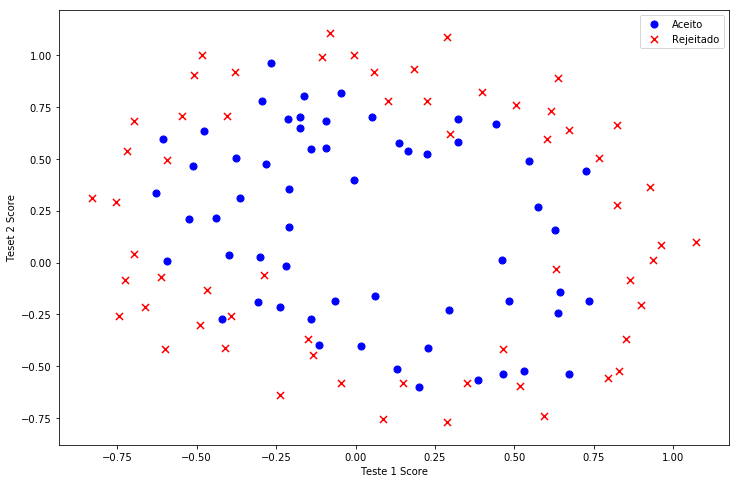

In [59]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['Teste1'], positive['Teste2'], s=50, c='b', marker='o', label='Aceito')  
ax.scatter(negative['Teste1'], negative['Teste2'], s=50, c='r', marker='x', label='Rejeitado')  
ax.legend()  
ax.set_xlabel('Teste 1 Score')  
ax.set_ylabel('Teset 2 Score')  

# 1.2 - Mapeamento de características (feature mapping)

In [60]:
dados.shape

(118, 3)

In [61]:

# Note that this function inserts a column with 'ones' in the design matrix for the intercept.
poly = PolynomialFeatures(6)
XX = poly.fit_transform(dados.values[:,0:2])
XX.shape


(118, 28)

# 1.3 Função de custo e gradiente


In [65]:
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))

In [66]:
def costFunctionReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [67]:
def gradientReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta.reshape(-1,1)))
      
    grad = (1/m)*XX.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

In [68]:
initial_theta = np.zeros(XX.shape[1])
costFunctionReg(initial_theta, 1, XX, y)

0.6931471805599454

In [75]:
def predict(theta, X):  
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

C:\Users\Raymundo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

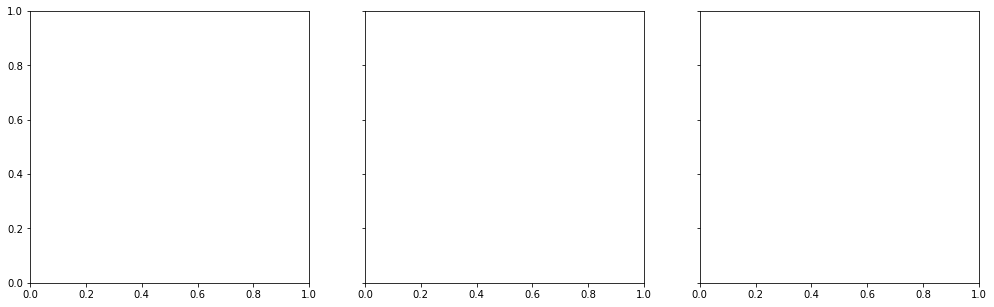

In [76]:

fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

# Decision boundaries
# Lambda = 0 : No regularization --> too flexible, overfitting the training data
# Lambda = 1 : Looks about right
# Lambda = 100 : Too much regularization --> high bias

for i, C in enumerate([0, 1, 100]):
    # Optimize costFunctionReg
    res2 = minimize(costFunctionReg, initial_theta, args=(C, XX, y), method=None, jac=gradientReg, options={'maxiter':3000})
    
    # Accuracy
    accuracy = 100*sum(predict(res2.x, XX) == y.ravel())/y.size    

    # Scatter plot of X,y
    plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    
    # Plot decisionboundary
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))